## Overview
In this notebook, we will implement a simple perceptron with 2 inputs and train it on an 8x8 card. 
*  The perceptron will try and predict a horizontal boundary for a single card. 
*  We will then try to train it poorly
    * first by giving it very few interations
    * and then by making the data noisy, and hence not linearly separable  

## The Data
* Each card is generated as a 8x8 matrix. 
* At some random horizontal offset (in the card below its `y>5`), the card will only output positive values.
* Positive output is shows in green, negative in red.
* The card, in essence, is horizontally partitioned between positive and negative regions.
* The perceptron should be able to learn this boundary.

<img src="../static/h1.png" alt="Card" style="width: 200px;">

### Input Vector
For training purposes, the inputs are stored as a one dimensional array X, of 64 elements. 
* Inputs are the `(x,y)` co-ordinates of the card. Hence, in a range of `(0,0)` to `(7,7)`.
* Green corresponds to inputs that must produce a positive output, red to negative. 

E.g. here the inputs will be represented as

``` python
    X =  [[0,0],[0,1],[0, 2] .. [0, 7],[1, 0],[1, 1] .. [7, 7,]]
```

### Output Vector
The outputs are correspondingly stored in a one dimensional array Y, of 64 elements.
* Every value is `1` or `-1`
* Every 8 elements represent a vertical column in the card,

![Serialized Output](../static/serialized-y.png)

``` python
   

#(x,y): (0,0)   (0,1)   (0,2)   (0,3)   (0,4)   (0,5)   (0,6)   (0,7)        
    Y = [
        -1,     -1,     -1,     -1,     -1,     -1,     1,      1, 
        
       ...
       
        -1,     -1,     -1,     -1,     -1,     -1,     1,      1,         
    ]
#(x,y): (7,0)   (7,1)   (7,2)   (7,3)   (7,4)   (7,5)   (7,6)   (7,7)    
```


In [186]:
import numpy as np
import copy
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [187]:

#generate a training card with a rectangular section marked positive 
def training_card(size=8, horizontal_partition = True, vertical_partition = True):
    X = np.zeros((size*size,2))
    Y = np.zeros([X.shape[0]])
    
    s = 0
    t_y = random.uniform(size/4,3*size/4) if horizontal_partition else -1
    t_x = random.uniform(0,size) if vertical_partition else -1  
    print("card_t:",t_x,t_y)
    for i in range (0,size):    
        for j in range (0,size):
            X[s]=[i,j] 
            Y[s]= 1 if (j> t_y and i>t_x) else -1
            s+=1
    return (X,Y)            

def draw_card(X,Y):
    plt.figure(figsize=(2,2))
    for i, x in enumerate(X):
        if Y[i] > 0:
            plt.scatter(x[0], x[1], s=100, marker='s', color='green',linewidths=2)
        # Plot the positive samples
        else:
            plt.scatter(x[0], x[1], s=100, marker='s', color='red', linewidths=2)
        

#### Perceptron Algorithm

$$ 
    z = \sum_{i=1}^n x_i w_i + b 
$$

$$ 
    output = \begin{cases}
        1 & \text{if }\ z > T \text{\, where T is some threshold }
        \\-1 & \text{otherwise}
        \end{cases}
$$
#### Learning 
We adjust the weight to reduce the error
$$
    \text{if } y*a \leq 0 \text{ then }
    \bigg|\begin{multline}
    \begin{aligned}
    w_i &= w_i + y x_i \text{ for i  = 1,2,3,..,n} \\
    b &= b + y
    \end{aligned}
    \end{multline}
$$



card_t: -1 3.252144803197865


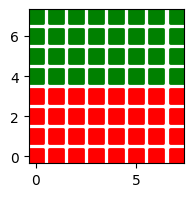

CONVERGENCE! Perceptron converged in  (epoch:18)
Weights => [-1. 15.], bias=-47.0
----------------------------------------



In [188]:
import sys, site
sys.path.insert(0,"..") 
from perceptron import perceptron as tron
import importlib
importlib.reload(tron)


#generate a cards and train to detect horizontal partitions 
weights = np.zeros(2)
bias = 0
(X,Y) = training_card(vertical_partition=False)
draw_card(X,Y)
plt.show()
(weights,bias, convergence) = tron.perceptron(X,Y,weights, bias,epochs=50)

def debug_training_weights(weights, bias, convergence):
    ##
    # Try changing the number of epochs. Lower epochs are usually better. 
    ##
    if convergence:
        print(f"CONVERGENCE! Perceptron converged in  (epoch:{convergence})")
    else: 
        print(f"Perceptron failed to converge")
    print(f"Weights => {weights}, bias={bias}\n{'-'*40}\n")

debug_training_weights(weights, bias, convergence)


## How well trained is the perceptron?
If the perceptron converged above, the prediction errors below should be ZERO. However, some training sets may not converge in 50 epochs. 
In practice it takes a lot fewer than 50 iterations.


In [189]:
#now check how many prediction errors the perceptron has
def debug_function(x,y,a):
    if (a * y) <= 0 :
        print(f"x={x}, y={y}, a={a}", "\x1b[31mMismatch\x1b[0m" )

#Predict and print info about mismatches. 
tron.predict_only(X,Y,weights, bias,debug_function)


Prediction Errors:0


0

# Not enough training - poorly trained perceptron
Lets train the perceptron to perform poorly. We shall give it very few epochs. (We could also introduce noise in the data, by randomly  reversing outputs )


card_t: -1 5.668356750529905


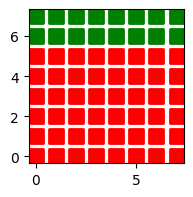

Perceptron failed to converge
Weights => [-6. 22.], bias=-23.0
----------------------------------------

x=[0. 2.], y=-1.0, a=21.0 Mismatch
x=[0. 3.], y=-1.0, a=43.0 Mismatch
x=[0. 4.], y=-1.0, a=65.0 Mismatch
x=[0. 5.], y=-1.0, a=87.0 Mismatch
x=[1. 2.], y=-1.0, a=15.0 Mismatch
x=[1. 3.], y=-1.0, a=37.0 Mismatch
x=[1. 4.], y=-1.0, a=59.0 Mismatch
x=[1. 5.], y=-1.0, a=81.0 Mismatch
x=[2. 2.], y=-1.0, a=9.0 Mismatch
x=[2. 3.], y=-1.0, a=31.0 Mismatch
x=[2. 4.], y=-1.0, a=53.0 Mismatch
x=[2. 5.], y=-1.0, a=75.0 Mismatch
x=[3. 2.], y=-1.0, a=3.0 Mismatch
x=[3. 3.], y=-1.0, a=25.0 Mismatch
x=[3. 4.], y=-1.0, a=47.0 Mismatch
x=[3. 5.], y=-1.0, a=69.0 Mismatch
x=[4. 3.], y=-1.0, a=19.0 Mismatch
x=[4. 4.], y=-1.0, a=41.0 Mismatch
x=[4. 5.], y=-1.0, a=63.0 Mismatch
x=[5. 3.], y=-1.0, a=13.0 Mismatch
x=[5. 4.], y=-1.0, a=35.0 Mismatch
x=[5. 5.], y=-1.0, a=57.0 Mismatch
x=[6. 3.], y=-1.0, a=7.0 Mismatch
x=[6. 4.], y=-1.0, a=29.0 Mismatch
x=[6. 5.], y=-1.0, a=51.0 Mismatch
x=[7. 3.], y=-1.0, a=1.

28

In [190]:
#generate card
(X,Y) = training_card(vertical_partition=False)
draw_card(X,Y)
plt.show()

##
# train the data with very few iterations ..say 5
# this could still converge, but chances are low
##
(weights,bias, convergence) = tron.perceptron(X,Y,np.zeros(2), 0,epochs=5)
debug_training_weights(weights, bias, convergence)

#Predict and print info about mismatches. 
tron.predict_only(X,Y,weights, bias,debug_function)


# Noisy Data - poorly trained perceptron
Lets train the perceptron to perform poorly. We shall give it very few epochs. (We could also introduce noise in the data, by randomly  reversing outputs )


card_t: -1 3.531559755998139


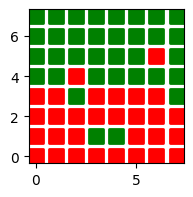

CONVERGENCE! Perceptron converged in  (epoch:9)
Weights => [-1. 14.], bias=-25.0
----------------------------------------

x=[0. 2.], y=-1.0, a=3.0 Mismatch
x=[0. 3.], y=-1.0, a=17.0 Mismatch
x=[1. 2.], y=-1.0, a=2.0 Mismatch
x=[1. 3.], y=-1.0, a=16.0 Mismatch
x=[2. 2.], y=-1.0, a=1.0 Mismatch
x=[2. 4.], y=-1.0, a=29.0 Mismatch
x=[3. 1.], y=1.0, a=-14.0 Mismatch
x=[3. 2.], y=-1.0, a=0.0 Mismatch
x=[3. 3.], y=-1.0, a=14.0 Mismatch
x=[4. 1.], y=1.0, a=-15.0 Mismatch
x=[4. 3.], y=-1.0, a=13.0 Mismatch
x=[5. 3.], y=-1.0, a=12.0 Mismatch
x=[6. 3.], y=-1.0, a=11.0 Mismatch
x=[6. 5.], y=-1.0, a=39.0 Mismatch
Prediction Errors:14


14

In [191]:
#generate card
(X,Y) = training_card(vertical_partition=False)

##
# Make the data noisy by reversing about 20% of the training set. 
for i,y in enumerate(Y):
        Y[i] = -Y[i] if not round(random.uniform(0,5)) else Y[i]
draw_card(X,Y)
plt.show()

##
# give it a good 50 epochs. 
# data is not likely to be linearly seprable, so there should be some amount of error
##
(weights,bias, convergence) = tron.perceptron(X,Y,np.zeros(2), 0,epochs=50)
debug_training_weights(weights, bias, convergence)

#Predict and print info about mismatches. 
tron.predict_only(X,Y,weights, bias,debug_function)
